In [1]:
import seaborn as sns
#1 Preprocessing phase.
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",encoding="ISO-8859-1",sep=";")
print('the head of df')
df.head()


the head of df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
print('the null colums')
df.isnull().sum()

the null colums


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 replace the null in Age
0      28.0
1      25.0
2      20.0
3      29.0
4      31.0
       ... 
886    14.0
887    22.0
888    30.0
889     NaN
890    19.0
Name: Age, Length: 891, dtype: float64
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Name: Age, Length: 891, dtype: bool


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

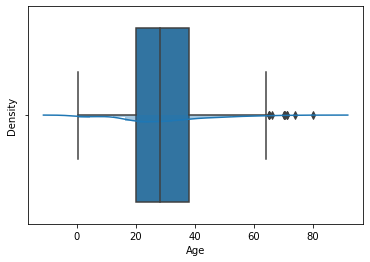

In [3]:
print(' replace the null in Age')
print(df['Age'])
print(df['Age'].isnull())
sns.boxplot(df.Age)
sns.distplot(df.Age)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

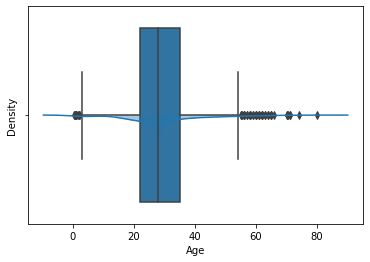

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
sns.boxplot(df.Age)
sns.distplot(df.Age)

In [5]:
print(' replace the null in Embarked')
print(df["Embarked"].value_counts())

 replace the null in Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
df["Embarked"].fillna('S',inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
print(' Drop the colum Cabin')
df2=df.dropna(axis=1)
df2.isnull().sum()

 Drop the colum Cabin


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
df2= df2.drop(columns=['Ticket', 'PassengerId']) 

In [9]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S


histogram Age


<AxesSubplot:title={'center':'Histogram of diffrent ages'}, xlabel='Age', ylabel='Frequency'>

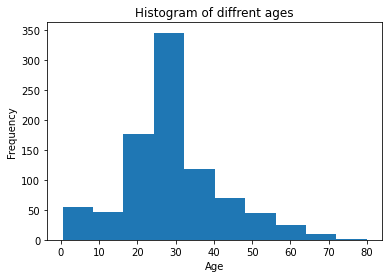

In [10]:
import matplotlib.pyplot as plt
print('histogram Age')
plt.title("Histogram of diffrent ages")
plt.xlabel("Age")
df2['Age'].plot.hist()

histogram Pclass


<AxesSubplot:title={'center':'Histogram of Pclass'}, xlabel='Pclass', ylabel='Frequency'>

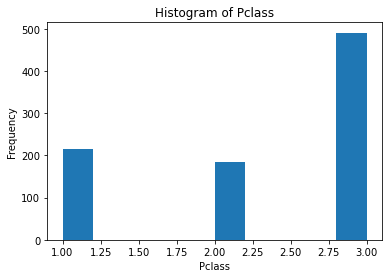

In [11]:
print('histogram Pclass')
plt.title("Histogram of Pclass")
plt.xlabel("Pclass")
df2['Pclass'].plot.hist()

SibSp


<AxesSubplot:title={'center':'SibSp'}, xlabel='SibSp', ylabel='Frequency'>

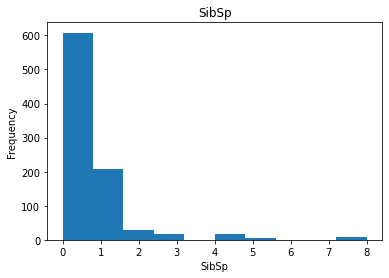

In [12]:
print('SibSp')
plt.title("SibSp")
plt.xlabel("SibSp")
df2['SibSp'].plot.hist()

Fare


<AxesSubplot:title={'center':'Fare'}, xlabel='Fare', ylabel='Frequency'>

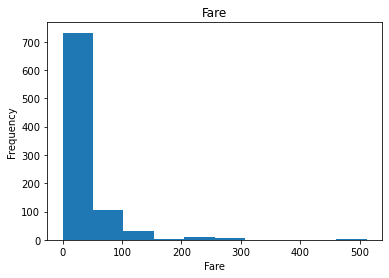

In [13]:
print('Fare')
plt.title("Fare")
plt.xlabel("Fare")
df2['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

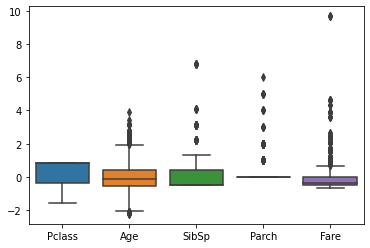

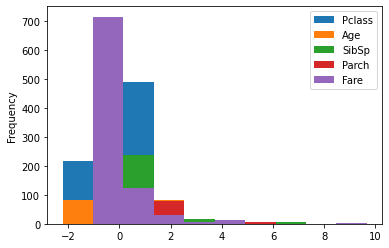

In [14]:
#standardization--
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2["Age"]=scaler.fit_transform(df2[["Age"]].values)
df2["SibSp"]=scaler.fit_transform(df2[["SibSp"]].values)
df2["Fare"]=scaler.fit_transform(df2[["Fare"]].values)
df2["Pclass"]=scaler.fit_transform(df2[["Pclass"]].values)
sns.boxplot(data=df2)
df2.plot.hist()

(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

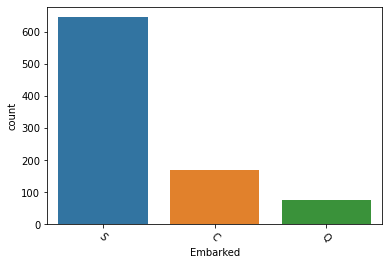

In [15]:
sns.countplot(x='Embarked',data=df2)
plt.xticks(rotation=-45)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

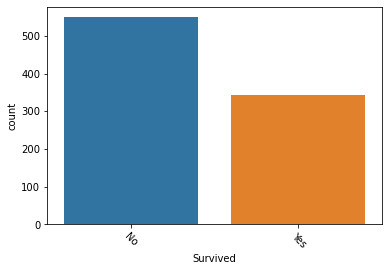

In [16]:
sns.countplot(x='Survived',data=df2)
plt.xticks(rotation=-45)

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

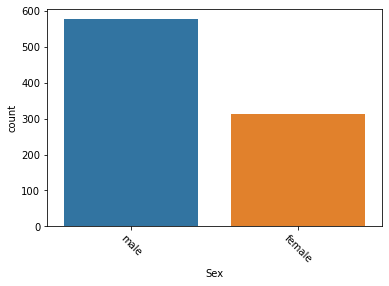

In [17]:
sns.countplot(x='Sex',data=df2)
plt.xticks(rotation=-45)

In [18]:
df2['Embarked'].values


array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'C', 'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'Q', 'C', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'Q', 'Q', 'S', 'S',
       'C', 'S', 'Q', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S',
       'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'Q',
       'Q', 'S', 'Q', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S

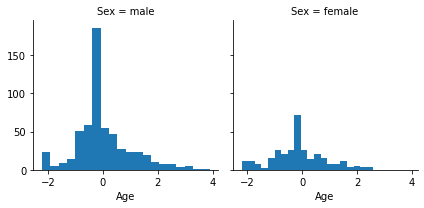

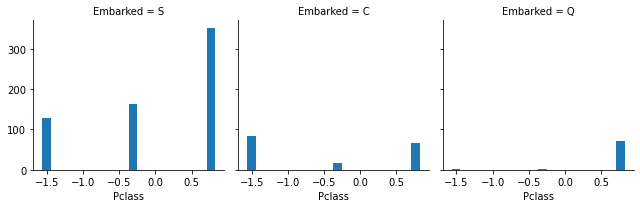

In [19]:
g=sns.FacetGrid(df2, col='Sex')
g.map(plt.hist, 'Age', bins=20)
g=sns.FacetGrid(df2, col='Embarked')
g.map(plt.hist, 'Pclass', bins=20)

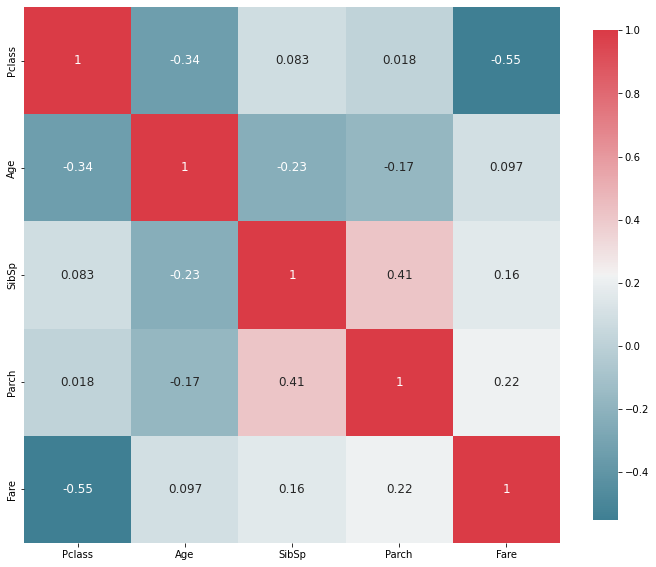

In [20]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df2)

In [21]:
df2[["Survived", "Pclass"]].groupby(["Survived"], as_index=True).mean()

,Pclass
Survived,
No,0.267154
Yes,-0.428852


In [22]:
# df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# print(list(df.Name.str))

In [23]:
# df2['Name'].values

def title(n):
    c=""
    liste = []
    for x in n:
        c=x.split(',')[1].split('.')[0]
        liste.append(c)
    return liste




In [24]:
df2["Title"]=title(df2['Name'])
df2.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,-0.369365,"Collander, Mr. Erik Gustaf",male,-0.104637,-0.474545,0,-0.386671,S,Mr
1,No,0.827377,"Moen, Mr. Sigurd Hansen",male,-0.335187,-0.474545,0,-0.494391,S,Mr
2,No,0.827377,"Jensen, Mr. Hans Peder",male,-0.719436,-0.474545,0,-0.490280,S,Mr
3,No,0.827377,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,-0.027788,-0.474545,4,-0.224083,S,Mrs
4,No,-1.566107,"Davidson, Mr. Thornton",male,0.125912,0.432793,0,0.398582,S,Mr


In [25]:
del df2['Name']
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,-0.369365,male,-0.104637,-0.474545,0,-0.386671,S,Mr
1,No,0.827377,male,-0.335187,-0.474545,0,-0.494391,S,Mr
2,No,0.827377,male,-0.719436,-0.474545,0,-0.490280,S,Mr
3,No,0.827377,female,-0.027788,-0.474545,4,-0.224083,S,Mrs
4,No,-1.566107,male,0.125912,0.432793,0,0.398582,S,Mr


In [26]:
df2[["Title", "Pclass"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Capt,-1.566107
Col,-1.566107
Don,-1.566107
Dr,-1.224181
Jonkheer,-1.566107
Lady,-1.566107
Major,-1.566107
Master,0.378599
Miss,-0.001137


In [27]:
df2[["Title", "Fare"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Capt,0.781141
Col,-0.023743
Don,-0.090272
Dr,0.341570
Jonkheer,-0.648422
Lady,0.148912
Major,-0.074080
Master,0.050315
Miss,0.233435


In [28]:
df2[["Title", "Age"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Capt,3.123056
Col,2.200858
Don,0.817561
Dr,0.817561
Jonkheer,0.663861
Lady,1.432359
Major,1.470784
Master,-1.724882
Miss,-0.488464


<AxesSubplot:>

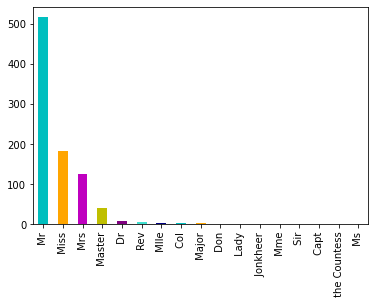

In [29]:
df2.Title.value_counts().plot(kind='bar',color=['c','orange','m','y','purple','turquoise','navy'])

In [30]:
def title2(n):
    Title_Dictionary = {

                   "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona" :       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
        
        
    liste = []
    for x in n:
        
        liste.append(Title_Dictionary.get(x[1:], "nothing"))
    return liste
 
    # get() method of dictionary data type returns
    # value of passed argument if it is present
    # in dictionary otherwise second argument will
    # be assigned as default value of passed argument


<AxesSubplot:>

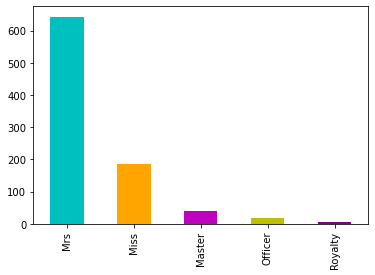

In [31]:
df2["Title"]=title2(df2["Title"])
df2.Title.value_counts().plot(kind='bar',color=['c','orange','m','y','purple','turquoise','navy'])

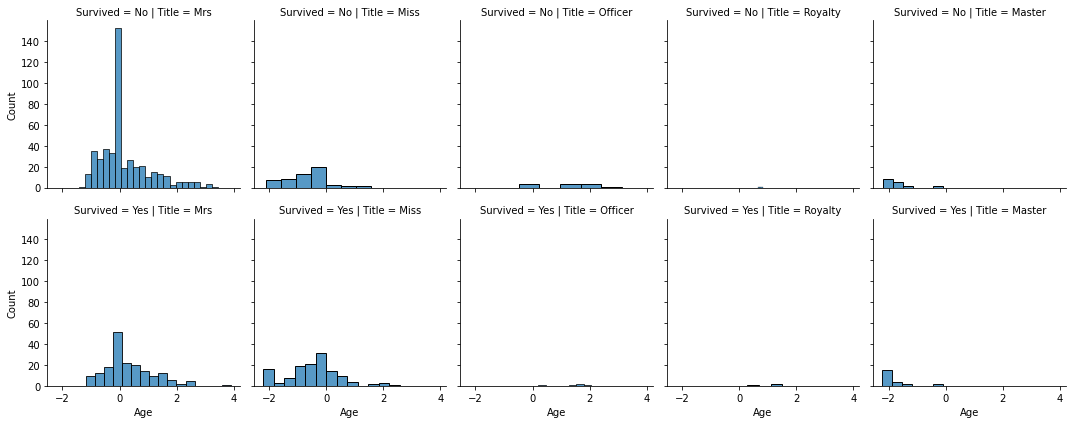

In [32]:
g_3=sns.FacetGrid(data=df2,col="Title",row='Survived')
g_3.map(sns.histplot,'Age')

In [33]:
df2['Survived'] = df['Survived'].map({'No':0, 'Yes':1})
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,-0.369365,male,-0.104637,-0.474545,0,-0.386671,S,Mrs
1,0,0.827377,male,-0.335187,-0.474545,0,-0.494391,S,Mrs
2,0,0.827377,male,-0.719436,-0.474545,0,-0.490280,S,Mrs
3,0,0.827377,female,-0.027788,-0.474545,4,-0.224083,S,Mrs
4,0,-1.566107,male,0.125912,0.432793,0,0.398582,S,Mrs


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age vs survival'}, xlabel='Age', ylabel='Density'>

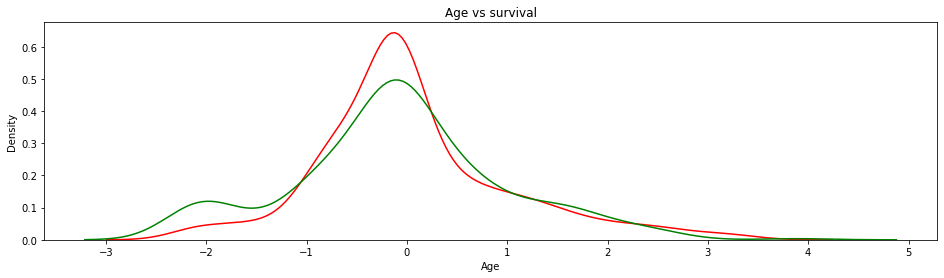

In [34]:
plt.figure(figsize=(16,4))
plt.title('Age vs survival')
sns.distplot(df2['Age'][df2['Survived']==0],bins=20,kde=True,hist=False,kde_kws={"color": "red", "label": "Not Survived"})
sns.distplot(df2['Age'][df2['Survived']==1],bins=20,kde=True,hist=False,kde_kws={"color": "green", "label": "Survived"})
# Age seems to vary with survival. Young-adults have more chance of surviving, while older people having age greater than 60 are at risk. the following age bins show significant variation in survival
# age<15) : 0
# Age(15-30) : 1
# Age(30-60) : 2
# age >60 : 3

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Fare vs survival'}, xlabel='Fare', ylabel='Density'>

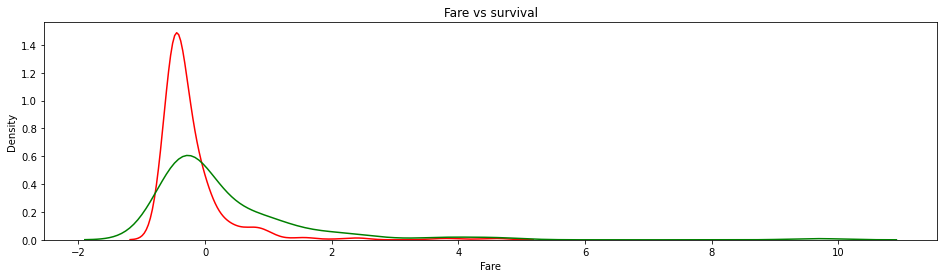

In [35]:
plt.figure(figsize=(16,4))
plt.title('Fare vs survival')
sns.distplot(df2['Fare'][df2['Survived']==0],bins=10,kde=True,hist=False,kde_kws={"color": "red", "label": "Not Survived"})
sns.distplot(df2['Fare'][df2['Survived']==1],bins=10,kde=True,hist=False,kde_kws={"color": "green", "label": "Survived"})
#Fare seems to vary with survival. the following fare bins show significant variation in survival
# 1.fare >0 and fare<=20 :0
# 2.fare >20 : 1 

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df2['Embarked']=encoder.fit_transform(df2['Embarked' ])
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,-0.369365,male,-0.104637,-0.474545,0,-0.386671,2,Mrs
1,0,0.827377,male,-0.335187,-0.474545,0,-0.494391,2,Mrs
2,0,0.827377,male,-0.719436,-0.474545,0,-0.490280,2,Mrs
3,0,0.827377,female,-0.027788,-0.474545,4,-0.224083,2,Mrs
4,0,-1.566107,male,0.125912,0.432793,0,0.398582,2,Mrs


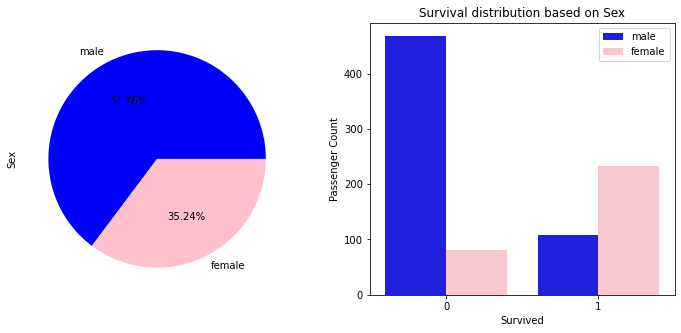

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df2['Sex'].value_counts().plot.pie(autopct='%0.2f%%',colors=['blue','pink'])
plt.subplot(122)
sns.countplot(x = 'Survived',data = df2,hue = 'Sex',palette=['blue','pink'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Sex')
plt.legend()

In [38]:
# Get one hot encoding of columns Sex
one_hot=pd.get_dummies(df2[ 'Sex'])
#  Drop column Sex as it is now encoded
df2=df2.drop('Sex', axis =1)
# Join the encoded df
df2=df2.join(one_hot)
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male
0,0,-0.369365,-0.104637,-0.474545,0,-0.386671,2,Mrs,0,1
1,0,0.827377,-0.335187,-0.474545,0,-0.494391,2,Mrs,0,1
2,0,0.827377,-0.719436,-0.474545,0,-0.490280,2,Mrs,0,1
3,0,0.827377,-0.027788,-0.474545,4,-0.224083,2,Mrs,1,0
4,0,-1.566107,0.125912,0.432793,0,0.398582,2,Mrs,0,1


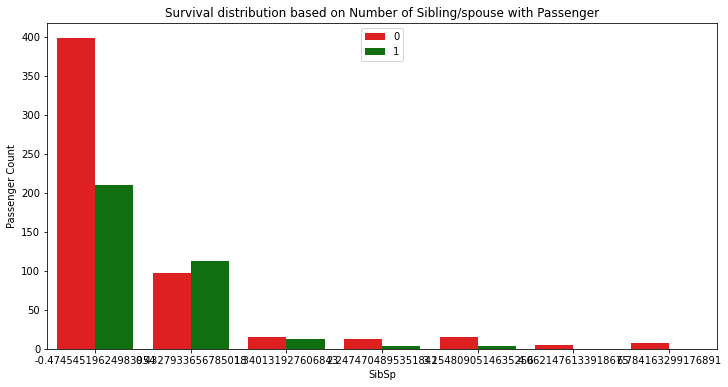

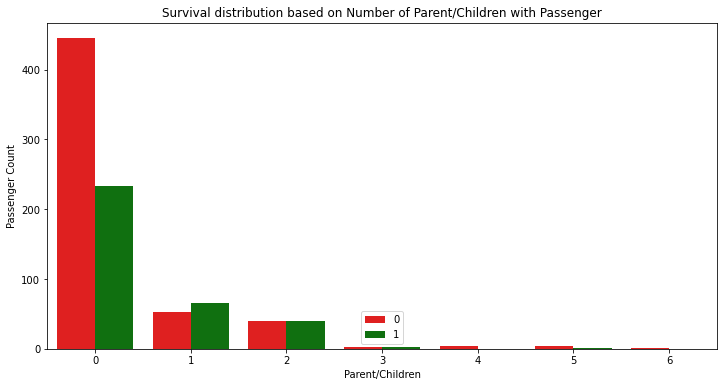

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'SibSp',data = df2,hue = 'Survived',palette=['red','green'])
plt.xlabel('SibSp')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Number of Sibling/spouse with Passenger')
plt.legend()

plt.figure(figsize=(12,6))
sns.countplot(x = 'Parch',data = df2,hue = 'Survived',palette=['red','green'])
plt.xlabel('Parent/Children')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Number of Parent/Children with Passenger')
plt.legend()

In [40]:
df2['FamilySize'] = df2['SibSp'] + df['Parch'] + 1
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,female,male,FamilySize
0,0,-0.369365,-0.104637,-0.474545,0,-0.386671,2,Mrs,0,1,0.525455
1,0,0.827377,-0.335187,-0.474545,0,-0.494391,2,Mrs,0,1,0.525455
2,0,0.827377,-0.719436,-0.474545,0,-0.490280,2,Mrs,0,1,0.525455
3,0,0.827377,-0.027788,-0.474545,4,-0.224083,2,Mrs,1,0,4.525455
4,0,-1.566107,0.125912,0.432793,0,0.398582,2,Mrs,0,1,1.432793


In [41]:
df2= df2.drop(columns=['SibSp', 'Parch']) 
df2.head()

,Survived,Pclass,Age,Fare,Embarked,Title,female,male,FamilySize
0,0,-0.369365,-0.104637,-0.386671,2,Mrs,0,1,0.525455
1,0,0.827377,-0.335187,-0.494391,2,Mrs,0,1,0.525455
2,0,0.827377,-0.719436,-0.490280,2,Mrs,0,1,0.525455
3,0,0.827377,-0.027788,-0.224083,2,Mrs,1,0,4.525455
4,0,-1.566107,0.125912,0.398582,2,Mrs,0,1,1.432793


<AxesSubplot:ylabel='Frequency'>

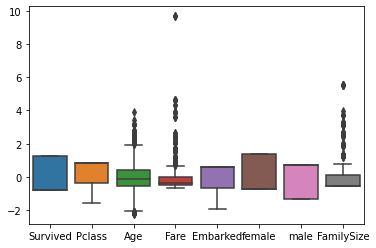

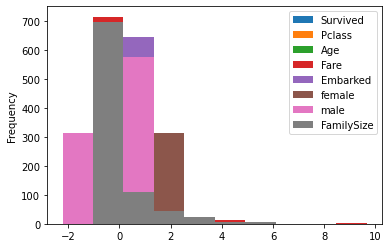

In [42]:
df2["Age"]=scaler.fit_transform(df2[["Age"]].values)
df2["Fare"]=scaler.fit_transform(df2[["Fare"]].values)
df2["Pclass"]=scaler.fit_transform(df2[["Pclass"]].values)
df2["Survived"]=scaler.fit_transform(df2[["Survived"]].values)
df2["FamilySize"]=scaler.fit_transform(df2[["FamilySize"]].values)
df2["female"]=scaler.fit_transform(df2[["female"]].values)
df2["male"]=scaler.fit_transform(df2[["male"]].values)
df2["Embarked"]=scaler.fit_transform(df2[["Embarked"]].values)
sns.boxplot(data=df2)
df2.plot.hist()

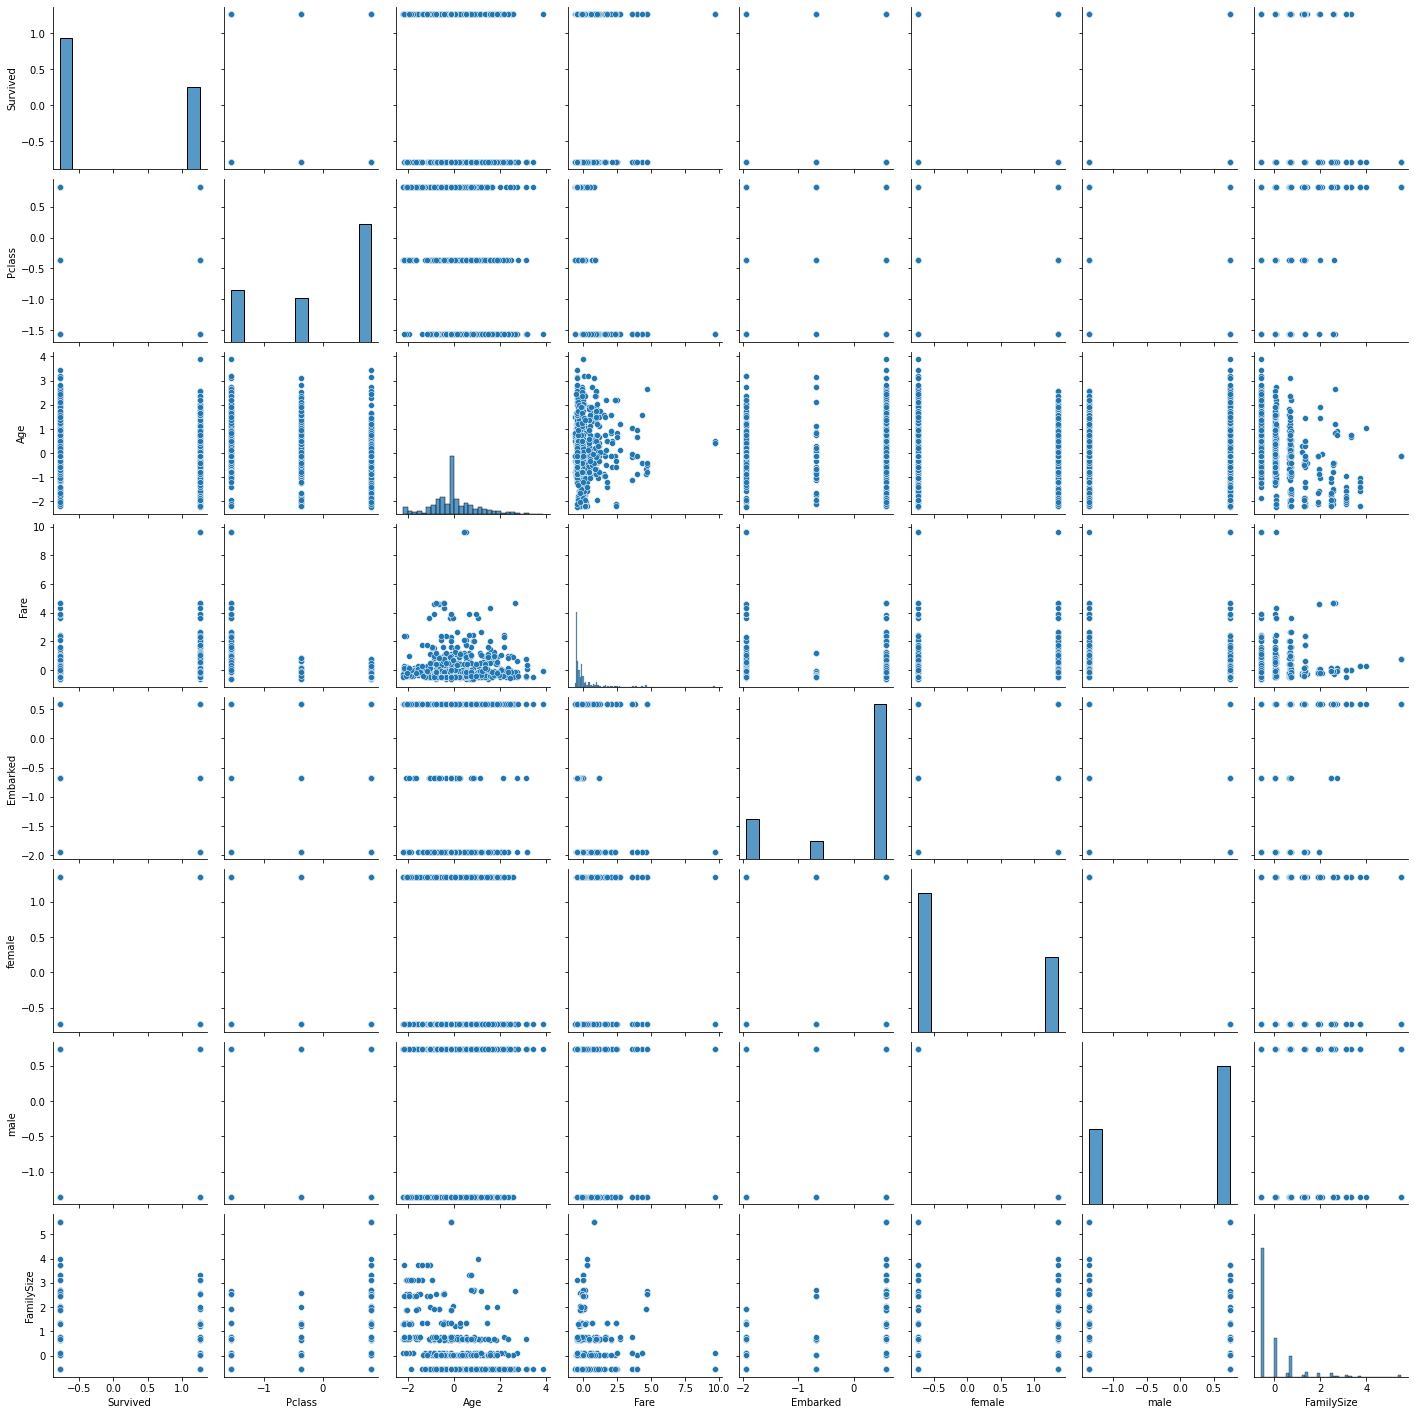

In [43]:
sns.pairplot(df2)

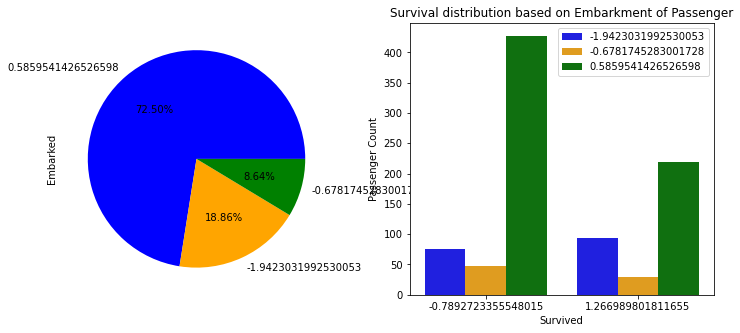

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df2['Embarked'].value_counts().plot.pie(autopct='%0.2f%%',colors=['blue','orange','green'])
plt.subplot(122)
sns.countplot(x = 'Survived',data = df2,hue = 'Embarked',palette=['blue','orange','green'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Embarkment of Passenger')
plt.legend()

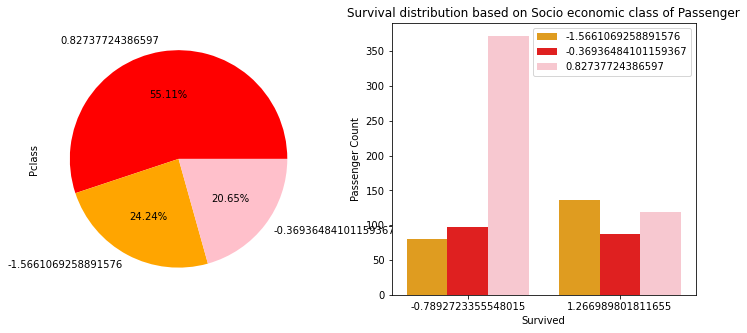

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df2['Pclass'].value_counts().plot.pie(autopct='%0.2f%%',colors=['red','orange','pink'])
plt.subplot(122)
sns.countplot(x = 'Survived',data = df2,hue = 'Pclass',palette=['orange','red','pink'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Socio economic class of Passenger')
plt.legend()